In [1]:
import numpy as np
import pandas as pd
import os, pickle

from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Encoder


In [7]:
enhancement = "roberta"
model = "gnoc"
file_mapping = {"vanilla": f"emb-rebase3-vanilla-catberta_1223_1537-eval-{model}-strc.pkl",
                "ca": f"emb-rebase3-da-catberta_1224_1518-eval-{model}-strc.pkl",
                "gap": f"emb-rebase-gap-catberta_1221_2208-eval-{model}-strc.pkl",
                "ca-gap": f"emb-rebase-da-gap-catberta_1226_0542-eval-{model}-strc.pkl",
                "ssl-oc20":f"emb-ssl-oc20-eqv2_1204_2048-eval-{model}-strc.pkl",
                'ssl-combined':f"emb-ssl-combined-eqv2_1207_1531-eval-{model}-strc.pkl",
                "roberta" :"emb-roberta-base-eval-gnoc-strc.pkl"
}
emb_file = file_mapping[enhancement]

In [8]:
data_path = f'/home/jovyan/shared-scratch/jhoon/ocp2023/clip_data/oc20dense_eval_{model}_relaxed.pkl'
emb_path = f"/home/jovyan/shared-scratch/jhoon/ocp2023/results/encoder_embedding/{emb_file}" #'/home/jovyan/shared-scratch/jhoon/ocp2023/results/encoder_embedding/catbert_ft_1201_0522_eval_escn-emb.pkl'
perplexity = 30

In [9]:
df_data = pd.read_pickle(data_path)
dict_emb = pd.read_pickle(emb_path) # change to dataframes

# change dict_emb (dictionary) to pandas dataframe with column name of 'emb'
df_emb = pd.DataFrame(list(dict_emb.items()), columns=['id', 'emb'])

# remove 'text', 'chg_emb' columns in df_data
df_data = df_data.drop(columns=['text', 'chg_emb'])

# combine df_data and df_emb along with 'id' column
df = pd.merge(df_data, df_emb, on='id') 
df

,id,target,emb
0,85487_-1,-0.559899,"[-0.026183715, 0.061478533, -0.006106816, -0.1..."
1,39118_110,-1.130786,"[0.0015545668, 0.07115657, -0.02999257, -0.084..."
2,2797_-1,-1.337591,"[-0.0051946538, 0.05881535, -0.020660624, -0.1..."
3,64221_170,0.885938,"[-0.011066805, 0.04177791, -0.027907563, -0.07..."
4,44017_160,-2.090978,"[-0.021129748, 0.041548572, -0.03325601, -0.11..."
...,...,...,...
11503,55536_186,-2.349694,"[-0.040445518, 0.066662475, -0.035049237, -0.1..."
11504,84011_298,-2.974431,"[-0.020921918, 0.07036492, -0.042493258, -0.09..."
11505,64542_152,0.239314,"[-0.035042364, 0.056991994, -0.021763982, -0.1..."
11506,71806_221,-1.262554,"[-0.019592164, 0.08314892, -0.04540198, -0.134..."


In [10]:
# Extract embeddings and targets
embeddings = np.array(df['emb'].tolist())
targets = df['target'].values

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
tsne_results = tsne.fit_transform(embeddings)

# Create a new DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne1', 'tsne2'])
tsne_df['target'] = targets

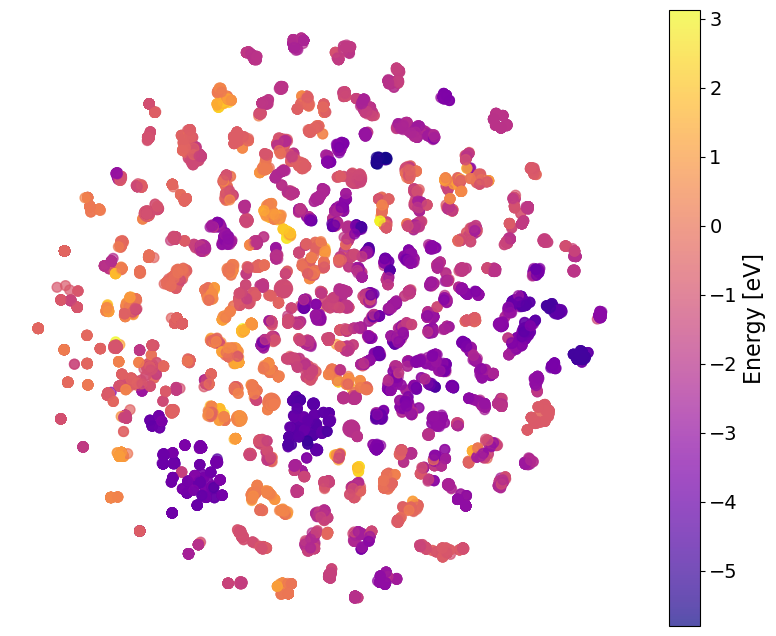

In [11]:
# Plot the t-SNE results
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(
    tsne_df['tsne1'],
    tsne_df['tsne2'],
    c=tsne_df['target'],
    cmap='plasma', #'coolwarm',
    marker='o',
    s=50,  # Adjust the size of data points
    alpha=0.7,  # Adjust transparency
)

# Remove box frame, ticks, and labels
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')

# Customize the color bar
cbar = plt.colorbar(scatter, label='Relaxed Energy [eV]')
cbar.ax.tick_params(labelsize=14)  # Adjust the tick label size
cbar.set_label('Energy [eV]', fontsize=16)  # Adjust the color bar label size

# # Set min and max values for color bar ticks
# min_value = -5.8  # Replace with your desired minimum value
# max_value = 3 # Replace with your desired maximum value
# cbar.set_ticks([min_value, max_value])


# tick_values = [-6, -4, -2, 0, 2, 4]  # Replace with your desired tick positions
# cbar.set_ticks(tick_values)
plt.show()

# save figure
fig.savefig(f'energy/{model}-{enhancement}-p{perplexity}.png', dpi=300, bbox_inches='tight')

# Projection Embedding

In [2]:
enhancement = "train-oc20"
model = "gnoc"
proj_emb_dir = "/home/jovyan/shared-scratch/jhoon/ocp2023/results/proj_embedding"


file_mapping = {"vanilla": "proj-emb-rebase3-vanilla-catberta_1223_1537-ssl-oc20-eqv2_1204_2048-eval-gnoc-strc.pkl",
                "ca": "proj-emb-rebase3-da-catberta_1224_1518-ssl-combined-eqv2_1207_1531-eval-gnoc-strc.pkl",
                "gap": "proj-emb-rebase-gap-catberta_1221_2208-ssl-oc20-eqv2_1204_2048-eval-gnoc-strc.pkl",
                "ca-gap": "proj-emb-rebase-da-gap-catberta_1226_0542-ssl-combined-eqv2_1207_1531-eval-gnoc-strc.pkl",
                "pt-oc20":"proj-emb-ssl-oc20-eqv2_1204_2048-ssl-oc20-eqv2_1204_2048-eval-gnoc-strc.pkl",
                "pt-combined":"proj-emb-ssl-combined-eqv2_1207_1531-ssl-combined-eqv2_1207_1531-eval-gnoc-strc.pkl",
                "train-oc20":"proj-emb-ssl-oc20-eqv2_1204_2048-ssl-oc20-eqv2_1204_2048-train-strc.pkl",
                "train-combined":""

}
emb_file = file_mapping[enhancement]

In [3]:
if enhancement == "train-oc20":
    data_path = f'/home/jovyan/shared-scratch/jhoon/ocp2023/clip_data/oc20_train_relaxed.pkl'
elif enhancement == "train-combined":
    data_path = f'/home/jovyan/shared-scratch/jhoon/ocp2023/clip_data/oc20_oc20dense_train_relaxed.pkl'
else:
    data_path = f'/home/jovyan/shared-scratch/jhoon/ocp2023/clip_data/oc20dense_eval_{model}_relaxed.pkl'
emb_path = f"/home/jovyan/shared-scratch/jhoon/ocp2023/results/proj_embedding/{emb_file}" #'/home/jovyan/shared-scratch/jhoon/ocp2023/results/encoder_embedding/catbert_ft_1201_0522_eval_escn-emb.pkl'
perplexity = 30

In [4]:
df_data = pd.read_pickle(data_path)
dict_emb = pd.read_pickle(emb_path) # change to dataframes

# change dict_emb (dictionary) to pandas dataframe with column name of 'emb'
df_emb = pd.DataFrame(list(dict_emb.items()), columns=['id', 'emb'])

# remove 'text', 'chg_emb' columns in df_data
if "train" not in enhancement:
    df_data = df_data.drop(columns=['text', 'chg_emb'])
elif "train" in enhancement:
    df_data = df_data.drop(columns=['text', 'chg_emb', 'eq_emb', 'gnoc_emb'])
    #df_data['id'] = df_data['id'].str.replace('random', '').astype(int)
    # add 'random' as prefix to 'id' column
    # df_data['id'] = 'random' + df_data['id'].astype(str)
# combine df_data and df_emb along with 'id' column
df = pd.merge(df_data, df_emb, on='id') 

# sample 1000 data points
df = df.sample(n=1000, random_state=42)

In [7]:
# sample 1000 data points
df = df.sample(n=1000, random_state=42)

In [8]:
# Extract embeddings and targets
embeddings = np.array(df['emb'].tolist())
targets = df['target'].values

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(embeddings)

# Create a new DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne1', 'tsne2'])
tsne_df['target'] = targets

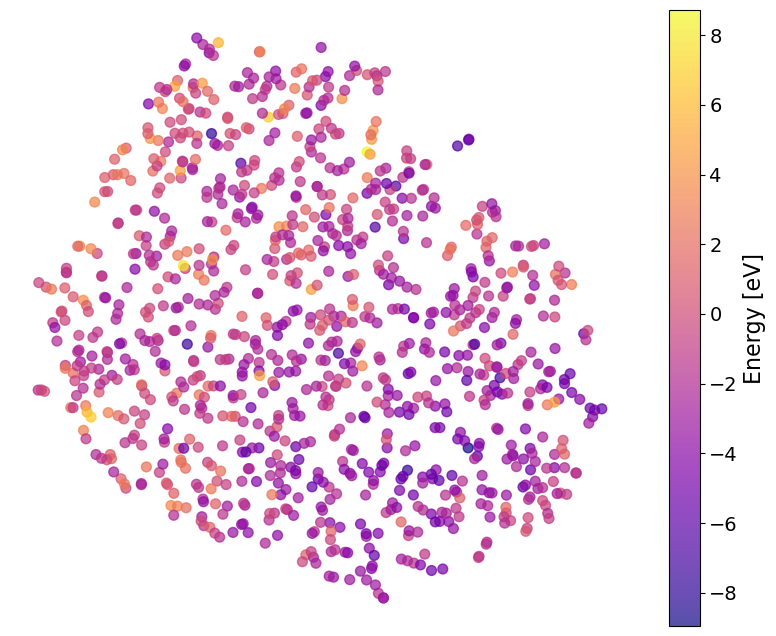

In [9]:
# Plot the t-SNE results
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(
    tsne_df['tsne1'],
    tsne_df['tsne2'],
    c=tsne_df['target'],
    cmap='plasma', #'coolwarm',
    marker='o',
    s=50,  # Adjust the size of data points
    alpha=0.7,  # Adjust transparency
)

# Remove box frame, ticks, and labels
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')

# Customize the color bar
cbar = plt.colorbar(scatter, label='Relaxed Energy [eV]')
cbar.ax.tick_params(labelsize=14)  # Adjust the tick label size
cbar.set_label('Energy [eV]', fontsize=16)  # Adjust the color bar label size

plt.show()

# save figure
if 'train' in enhancement:
    save_name = f"proj-tsne-{enhancement}.png"
else:
    save_name = f"proj-tsne-{enhancement}-{model}.png"
#fig.savefig(save_name, dpi=300, bbox_inches='tight')

# Equiformer Embedding

In [42]:
model = 'gnoc'
emb_dir_mappipng = {"gnoc": "2023-12-28-18-37-52-eq31-maxpool-gnoc-eval",
                    "scn": "2023-12-28-21-41-20-eq31-maxpool-scn-eval",
                    "escn": "2023-12-08-18-54-56-eq31-maxpool-escn-eval"}

label_dir_mapping = {"gnoc": "2023-12-03-03-33-20-eqv2-gnoc-eval",
                    "scn": "2023-12-03-07-15-12-eqv2-scn-eval",
                    "escn": "2023-12-03-07-25-52-eqv2-escn-eval"}

emb_dir = emb_dir_mappipng[model]
label_dir = label_dir_mapping[model]

In [43]:
emb_path = f"/home/jovyan/shared-scratch/jhoon/ocp2023/results/embedding/results/{emb_dir}/s2ef_predictions.npz"
emb_data = np.load(emb_path)

In [44]:
data_path = f"/home/jovyan/shared-scratch/jhoon/ocp2023/clip_data/oc20dense_eval_{model}_relaxed.pkl"
df_data = pd.read_pickle(data_path)

In [45]:
# change dict_emb (dictionary) to pandas dataframe with column name of 'emb'
# df_emb = pd.DataFrame({
#     'ids': emb_data['ids'],
#     'energy': emb_data['energy']
# })

ids = emb_data['ids']
energies = emb_data['energy']
df_emb = pd.DataFrame({
    'id': ids,
    'embedding': list(map(np.array, energies))
})
# Creating a list of DataFrames, one for each id
# df_emb = [pd.DataFrame({'id': id, 'energy': energies[i, :]}) for i, id in enumerate(ids)]

# remove 'text', 'chg_emb' columns in df_data
df_data = df_data.drop(columns=['text', 'chg_emb'])

# combine df_data and df_emb along with 'id' column
df = pd.merge(df_data, df_emb, on='id') 
df

,id,target,embedding
0,85487_-1,-0.559899,"[-0.4143, 1.826, 0.8164, 7.125, -0.0447, 5.047..."
1,39118_110,-1.130786,"[0.677, 4.445, -0.523, 2.652, 0.7417, 4.336, 1..."
2,2797_-1,-1.337591,"[-0.0277, 3.582, -0.2208, 7.496, 1.466, 3.633,..."
3,64221_170,0.885938,"[1.11, 4.48, 0.6533, 7.348, 1.227, 7.26, 2.156..."
4,44017_160,-2.090978,"[-0.006176, 3.135, -0.7144, 6.727, 1.003, -1.6..."
...,...,...,...
11503,55536_186,-2.349694,"[0.535, 2.639, -0.1702, 7.24, -0.04846, 0.585,..."
11504,84011_298,-2.974431,"[-0.09546, 1.281, -0.711, 6.582, -0.0691, -1.1..."
11505,64542_152,0.239314,"[0.9966, 4.652, 0.4302, 7.027, 0.8047, 5.367, ..."
11506,71806_221,-1.262554,"[0.1306, 2.635, -0.592, 7.15, -0.1045, -0.1831..."


In [46]:
# Extract embeddings and targets
embeddings = np.stack(df['embedding'].values) #df['embedding']
targets = df['target']

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(embeddings)

# Create a new DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne1', 'tsne2'])
tsne_df['target'] = targets

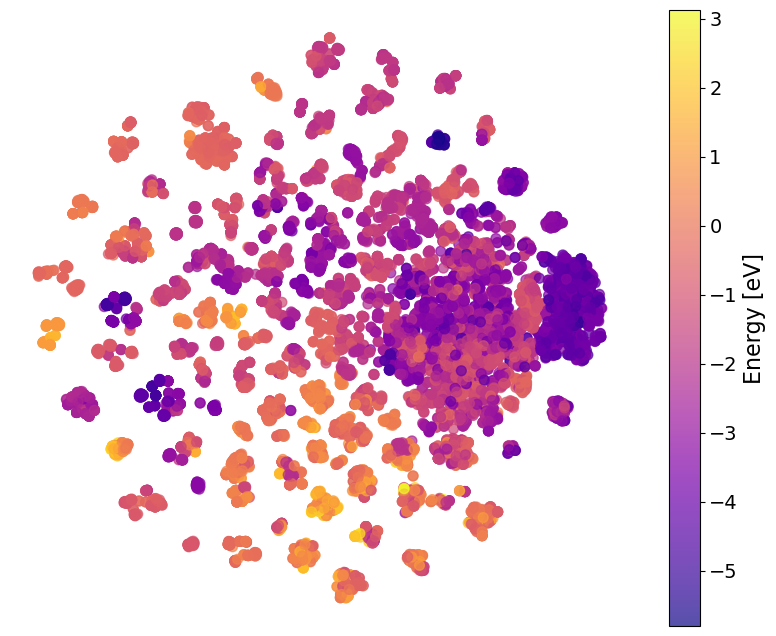

In [47]:
# Plot the t-SNE results
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(
    tsne_df['tsne1'],
    tsne_df['tsne2'],
    c=tsne_df['target'],
    cmap='plasma', #'coolwarm',
    marker='o',
    s=50,  # Adjust the size of data points
    alpha=0.7,  # Adjust transparency
)

# Remove box frame, ticks, and labels
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')

# Customize the color bar
cbar = plt.colorbar(scatter)
cbar.ax.tick_params(labelsize=14)  # Adjust the tick label size
cbar.set_label('Energy [eV]', fontsize=16)  # Adjust the color bar label size

plt.show()

# save figure
fig.savefig(f'tsne-eq-emb-{model}.png', dpi=300, bbox_inches='tight')

In [107]:
label_path = f"/home/jovyan/shared-scratch/jhoon/ocp2023/results/ml-relax-pred/{model}/{label_dir}/s2ef_predictions.npz"
label_data = np.load(label_path)

In [113]:
sum(emb_data['ids'] == label_data['ids']) == len(emb_data['ids'])

True

In [108]:
emb_data['energy']

array([[-0.3596 ,  1.635  ,  0.513  , ..., -0.4058 , -0.4426 , -0.3716 ],
       [ 0.3206 ,  2.473  ,  0.3735 , ..., -0.0608 ,  0.1631 ,  1.122  ],
       [ 1.543  ,  1.245  ,  0.1672 , ..., -0.4077 , -0.4363 ,  0.3562 ],
       ...,
       [-0.548  ,  2.426  ,  0.546  , ..., -0.04495, -0.432  ,  0.2832 ],
       [ 0.67   ,  3.602  ,  0.5063 , ..., -0.3162 , -0.443  ,  1.52   ],
       [ 0.5303 ,  4.383  , -0.4985 , ...,  0.04993,  0.3367 , -0.829  ]],
      dtype=float16)

In [62]:
# Extract embeddings and targets
embeddings = emb_data['energy']
targets = label_data['energy']

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(embeddings)

# Create a new DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne1', 'tsne2'])
tsne_df['target'] = targets

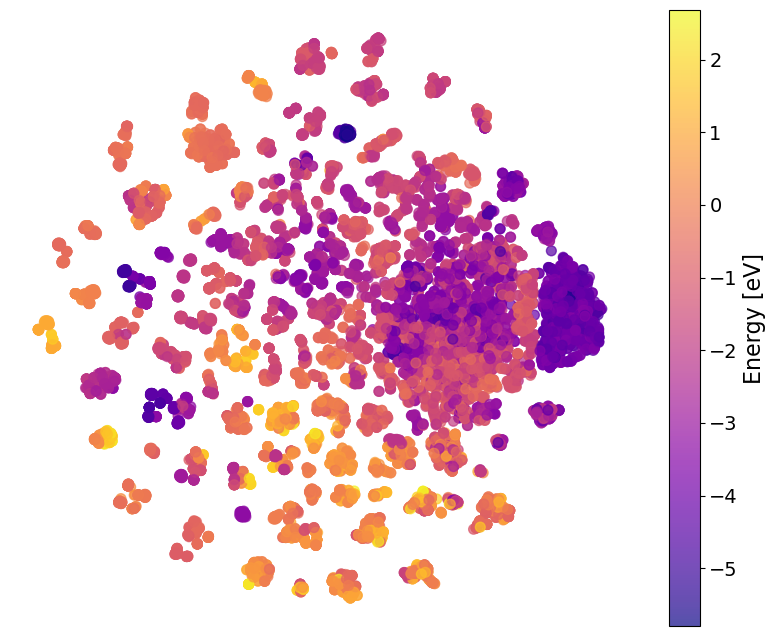

In [63]:
# Plot the t-SNE results
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(
    tsne_df['tsne1'],
    tsne_df['tsne2'],
    c=tsne_df['target'],
    cmap='plasma', #'coolwarm',
    marker='o',
    s=50,  # Adjust the size of data points
    alpha=0.7,  # Adjust transparency
)

# Remove box frame, ticks, and labels
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')

# Customize the color bar
cbar = plt.colorbar(scatter)
cbar.ax.tick_params(labelsize=14)  # Adjust the tick label size
cbar.set_label('Energy [eV]', fontsize=16)  # Adjust the color bar label size

plt.show()

# save figure
fig.savefig(f'tsne-eq-emb-{model}.png', dpi=300, bbox_inches='tight')